<a href="https://colab.research.google.com/github/Karina1014/ChatLive/blob/main/IFI1_LSTM_timeseries_univariado_unistep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*FORECASTING* CON REDES LSTM - PARTE 2: MODELO UNIVARIADO - UNISTEP

## 1. Introducción

Primer tipo de Red LSTM más sencillo para realizar la predicción: el modelo univariado - unistep.



##2. El set de datos



##3. El problema a resolver

Crear y entrenar una Red LSTM usando el enfoque univariado + single-step:

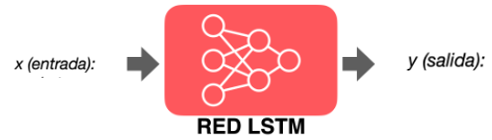

##4. Lectura del set de datos

In [ ]:
# Importar las bibliotecas necesarias
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Montar Google Drive
drive.mount('/content/drive')

# Definir la ruta donde está almacenado tu archivo CSV en Google Drive
ruta = '/content/drive/MyDrive/'
archivo_csv = 'Evolución tasas pasivas (1).csv'

# Leer el archivo CSV
df = pd.read_csv(ruta + archivo_csv, sep=';')

df

Mounted at /content/drive


,Category,Bancos | Total Captaciones a plazo | Tasa Nominal |,Cooperativas S1 | Total Captaciones a plazo | Tasa Nominal |,IFI1 | Total Captaciones a plazo | Tasa Nominal |
0,2022-01-05,4.114928,7.246206,5.472
1,2022-01-12,3.955619,7.238806,5.310
2,2022-01-19,4.160792,7.151338,5.523
3,2022-01-26,3.932185,7.201167,5.332
4,2022-02-02,4.126170,7.230777,5.474
...,...,...,...,...
122,2024-05-08,8.307521,8.002337,7.165
123,2024-05-15,8.322522,8.032994,7.335
124,2024-05-22,8.342302,8.019188,7.353
125,2024-05-29,7.941170,7.958701,7.380


Originalmente el dataset contiene 50.278 registros y 15 variables.

##5. Pre-procesamiento

Implica:

1. Partición en train/val/test
2. Generación del dataset supervisado: entrada y salida del modelo
3. Escalamiento

Veamos cada una de estas fases.

### 5.1. Partición del set en entrenamiento, validación y prueba

A diferencia de otros modelos de Machine Learning, en el caso de series de tiempo **se debe garantizar que se generan las particiones sin mezclar aleatoriamente los datos**.

Recordemos además que:
- El set de entrenamiento (*train*) se usará para encontrar los parámetros del modelo
- El set de validación (*val*) para verificar que no haya *under/over-fitting* del modelo y para ajustar sus hiperparámetros
- El set de prueba (*test*) para poner a prueba el mejor modelo encontrado durante el entrenamiento/validación

DataFrame original:
       Fechas    Bancos  Cooperativas   IFI1
0  2022-01-05  4.114928      7.246206  5.472
1  2022-01-12  3.955619      7.238806  5.310
2  2022-01-19  4.160792      7.151338  5.523
3  2022-01-26  3.932185      7.201167  5.332
4  2022-02-02  4.126170      7.230777  5.474

Tamaño set de entrenamiento: (50,)
Tamaño set de validación: (50,)
Tamaño set de prueba: (27,)

DataFrame filtrado:
       Fechas    Bancos  Cooperativas   IFI1
0  2022-01-05  4.114928      7.246206  5.472
1  2022-01-12  3.955619      7.238806  5.310
2  2022-01-19  4.160792      7.151338  5.523
3  2022-01-26  3.932185      7.201167  5.332
4  2022-02-02  4.126170      7.230777  5.474

Archivo filtrado convertido a CSV y guardado como /content/drive/MyDrive/Evolución_tasas_pasivas_filtrado.csv


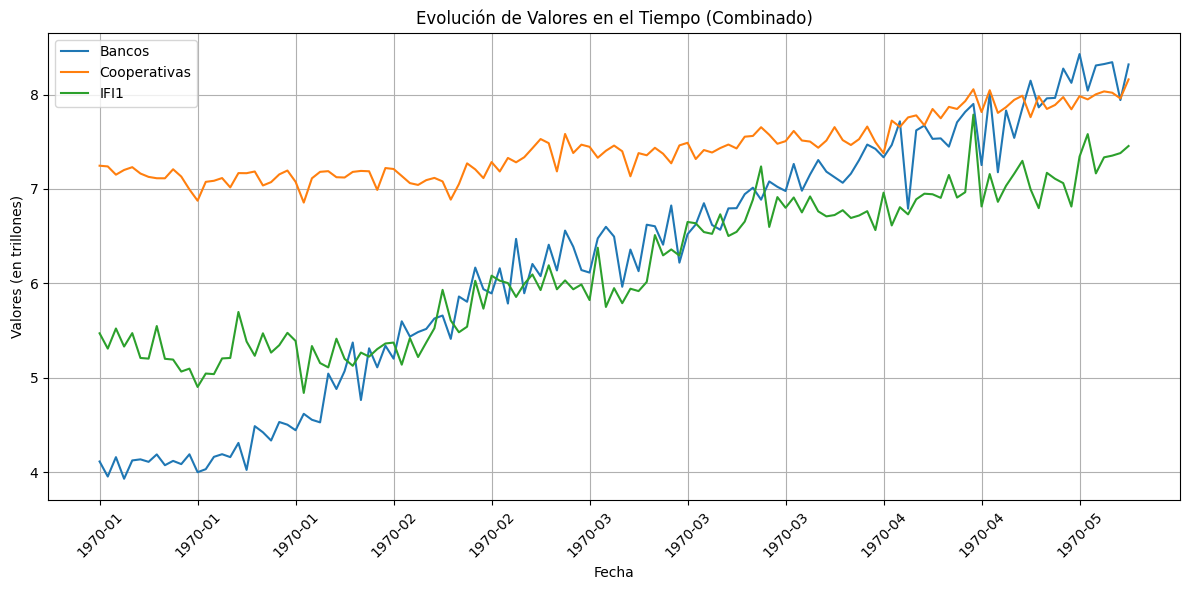

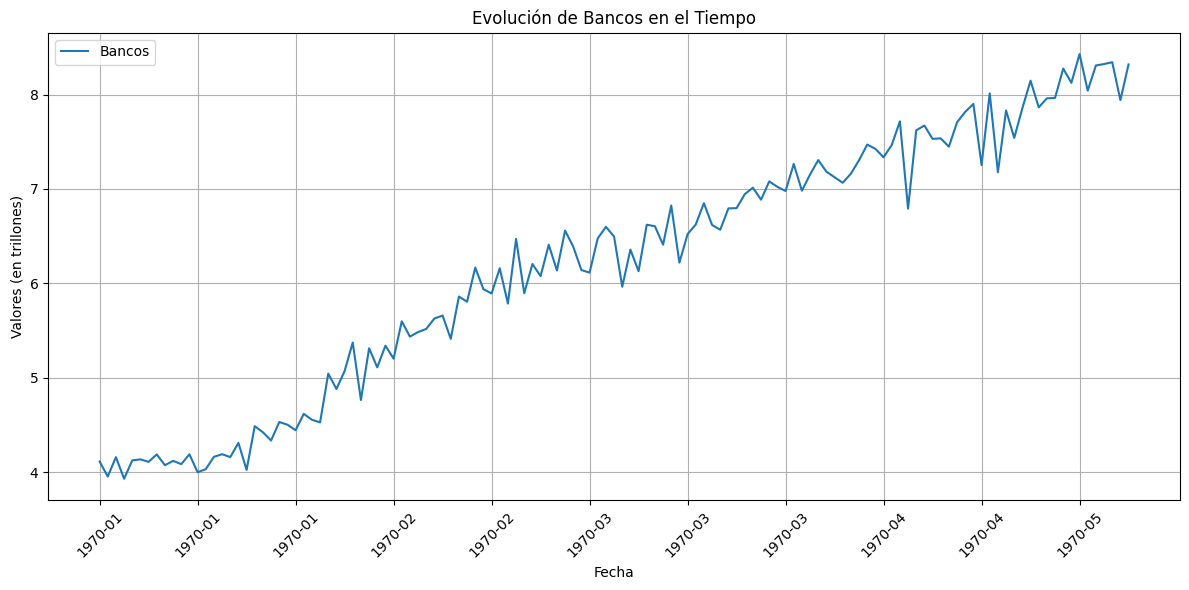

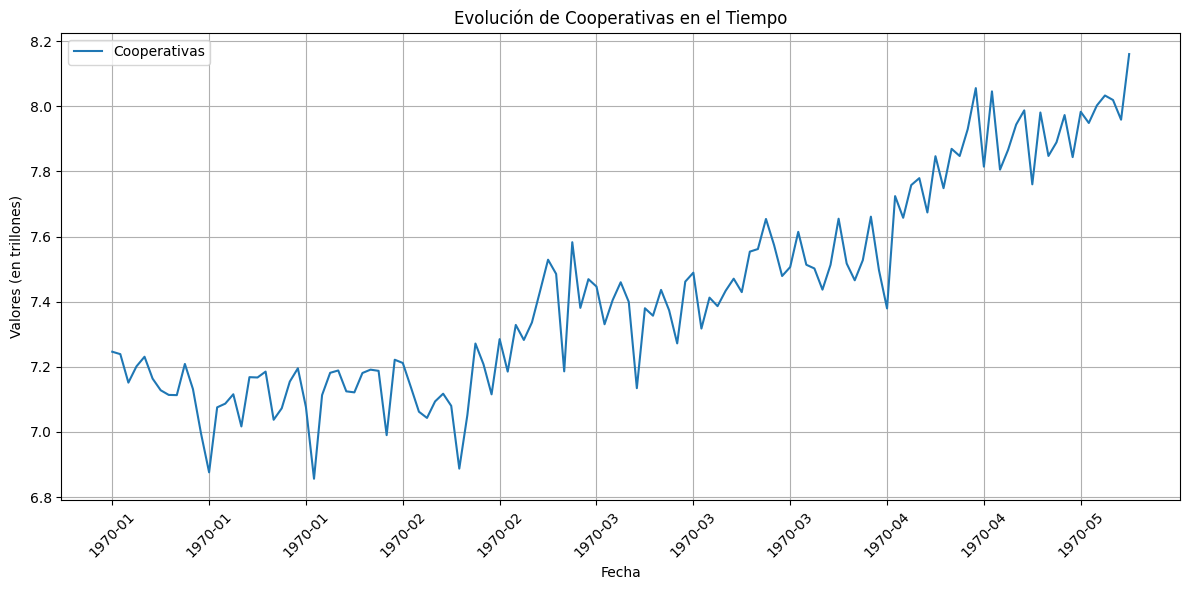

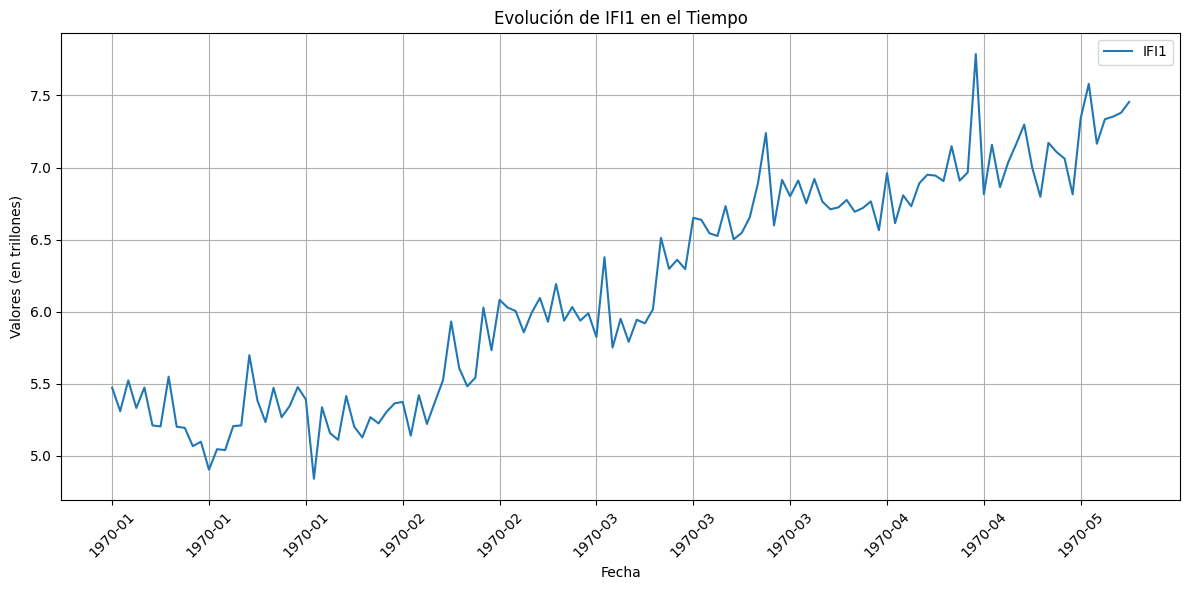

In [ ]:
# Leer el archivo CSV
df = pd.read_csv(ruta + archivo_csv, sep=';')

df
# Función para generar las particiones preservando las características de la serie de tiempo
def train_val_test_split(serie, tr_size=0.4, vl_size=0.4, ts_size=0.1):
    # Definir número de datos en cada subserie
    N = serie.shape[0]
    Ntrain = int(tr_size * N)  # Número de datos de entrenamiento
    Nval = int(vl_size * N)    # Número de datos de validación
    Ntst = N - Ntrain - Nval   # Número de datos de prueba

    # Realizar partición
    train = serie[:Ntrain]
    val = serie[Ntrain:Ntrain + Nval]
    test = serie[Ntrain + Nval:]

    return train, val, test

# Renombrar las columnas del DataFrame
df.columns = ['Fechas','Bancos', 'Cooperativas', 'IFI1']

# Mostrar el DataFrame para verificar los datos leídos
print("DataFrame original:")
print(df.head())

# Prueba de la función de partición de datos
tr, vl, ts = train_val_test_split(df['IFI1'])

# Mostrar las dimensiones de los conjuntos de entrenamiento, validación y prueba
print(f'\nTamaño set de entrenamiento: {tr.shape}')
print(f'Tamaño set de validación: {vl.shape}')
print(f'Tamaño set de prueba: {ts.shape}')

# Filtrar los datos para el rango de fechas deseado
df_filtered = df[(df['Fechas'] >= '2022-01-01') & (df['Fechas'] <= '2024-12-31')].copy()

# Mostrar las primeras filas del DataFrame filtrado para verificar el resultado
print("\nDataFrame filtrado:")
print(df_filtered.head())

# Convertir el DataFrame filtrado a CSV
csv_file_path_filtered = ruta + 'Evolución_tasas_pasivas_filtrado.csv'
df_filtered.to_csv(csv_file_path_filtered, index=False, sep=';')
print(f"\nArchivo filtrado convertido a CSV y guardado como {csv_file_path_filtered}")

# Graficar los datos filtrados por cada variable
variables = ['Bancos', 'Cooperativas', 'IFI1']

# Gráfico combinado de todas las variables
plt.figure(figsize=(12, 6))
for variable in variables:
    plt.plot(df_filtered['Fechas'], df_filtered[variable], label=variable)

plt.xlabel('Fecha')
plt.ylabel('Valores (en trillones)')
plt.title('Evolución de Valores en el Tiempo (Combinado)')
plt.gca().xaxis.set_major_formatter(DateFormatter("%Y-%m"))
plt.xticks(df_filtered['Fechas'][::int(len(df_filtered['Fechas'])/10)].tolist(), rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Gráficos individuales para cada variable
for variable in variables:
    plt.figure(figsize=(12, 6))
    plt.plot(df_filtered['Fechas'], df_filtered[variable], label=variable)
    plt.xlabel('Fecha')
    plt.ylabel('Valores (en trillones)')
    plt.title(f'Evolución de {variable} en el Tiempo')
    plt.gca().xaxis.set_major_formatter(DateFormatter("%Y-%m"))
    plt.xticks(df_filtered['Fechas'][::int(len(df_filtered['Fechas'])/10)].tolist(), rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()



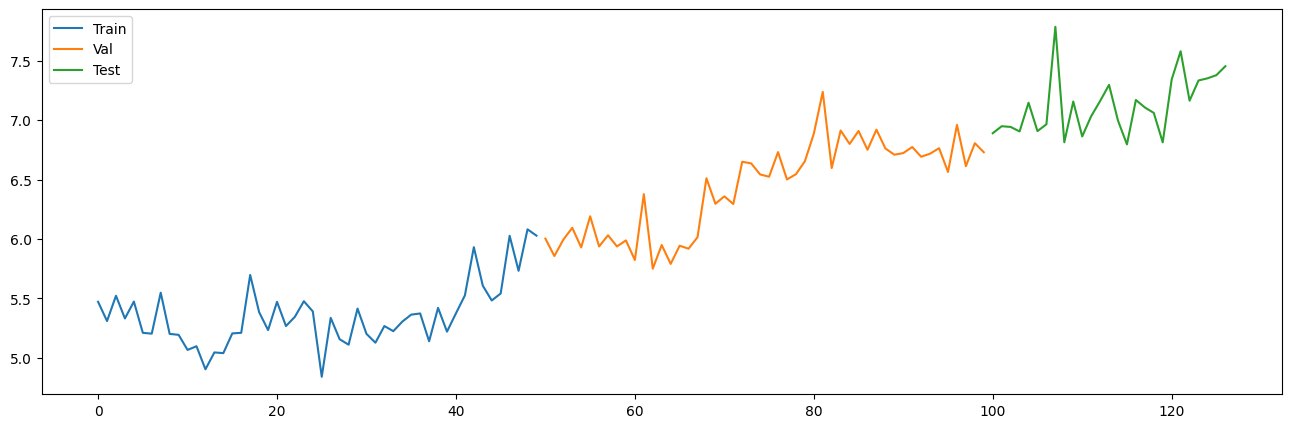

In [ ]:
# Dibujemos los subsets
fig, ax = plt.subplots(figsize = (16,5))
ax.plot(tr, label='Train')
ax.plot(vl, label='Val')
ax.plot(ts, label='Test')
plt.legend();

Observemos que por ser un modelo univariado

###5.2 Generación del dataset supervisado (entrada y salida del modelo)

Debemos ajustar nuestro set de datos de acuerdo a lo especificado con TensorFlow/Keras



In [ ]:
def crear_dataset_supervisado(array, input_length, output_length):
    '''Permite crear un dataset con las entradas (X) y salidas (Y)
    requeridas por la Red LSTM.

    Parámetros:
    - array: arreglo numpy de tamaño N x features (N: cantidad de datos,
      f: cantidad de features)
    - input_length: instantes de tiempo consecutivos de la(s) serie(s) de tiempo
      usados para alimentar el modelo
    - output_length: instantes de tiempo a pronosticar (salida del modelo)
    '''

    # Inicialización
    X, Y = [], []    # Listados que contendrán los datos de entrada y salida del modelo
    shape = array.shape
    if len(shape)==1: # Si tenemos sólo una serie (univariado)
        fils, cols = array.shape[0], 1
        array = array.reshape(fils,cols)
    else: # Multivariado
        fils, cols = array.shape

    # Generar los arreglos
    for i in range(fils-input_length-output_length):
        X.append(array[i:i+INPUT_LENGTH,0:cols])
        Y.append(array[i+input_length:i+input_length+output_length,-1].reshape(output_length,1))

    # Convertir listas a arreglos de NumPy
    X = np.array(X)
    Y = np.array(Y)

    return X, Y

In [ ]:
import numpy as np

In [ ]:
# Crear los datasets de entrenamiento, prueba y validación y verificar sus tamaños
INPUT_LENGTH = 13    # Posteriormente afinaremos este hiperparámetro tomamos 13 semanas
OUTPUT_LENGTH = 1    # Modelo uni-step como univariado siempre sera 1

x_tr, y_tr = crear_dataset_supervisado(tr.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_vl, y_vl = crear_dataset_supervisado(vl.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_ts, y_ts = crear_dataset_supervisado(ts.values, INPUT_LENGTH, OUTPUT_LENGTH)

# Imprimir información en pantalla
print('Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)')
print(f'Set de entrenamiento - x_tr: {x_tr.shape}, y_tr: {y_tr.shape}')
print(f'Set de validación - x_vl: {x_vl.shape}, y_vl: {y_vl.shape}')
print(f'Set de prueba - x_ts: {x_ts.shape}, y_ts: {y_ts.shape}')

Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)
Set de entrenamiento - x_tr: (36, 13, 1), y_tr: (36, 1, 1)
Set de validación - x_vl: (36, 13, 1), y_vl: (36, 1, 1)
Set de prueba - x_ts: (13, 13, 1), y_ts: (13, 1, 1)


###5.3 Escalamiento

Es requerido para garantizar que todas las características se encuentran en el mismo rango de valores, lo que facilita el entrenamiento del modelo y las predicciones:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def escalar_dataset(data_input):
    '''Escala el dataset en el rango de -1 a 1.

    Entradas:
    data_input: diccionario con los dataset de entrada y salida del modelo
    (data_input = {'x_tr':x_tr, 'y_tr':y_tr, 'x_vl':x_vl, 'y_vl':y_vl,
                    'y_ts':y_ts})

    Retorna:
    - data_scaled: diccionario con los datasets de entrada y salida escalados
      (tiene la misma estructura del diccionario de entrada)
    - scaler: el escalador usado (requerido para las predicciones)
    '''

    NFEATS = data_input['x_tr'].shape[2]


    # Generar listado con "scalers" (en este caso, por ser sólo 1 característica
    # se tendrá sólo 1 escalador)
    scalers = [MinMaxScaler(feature_range=(-1,1)) for i in range(NFEATS)]

    # Arreglos que contendrán los datasets escalados
    x_tr_s = np.zeros(data_input['x_tr'].shape)
    x_vl_s = np.zeros(data_input['x_vl'].shape)
    x_ts_s = np.zeros(data_input['x_ts'].shape)
    y_tr_s = np.zeros(data_input['y_tr'].shape)
    y_vl_s = np.zeros(data_input['y_vl'].shape)
    y_ts_s = np.zeros(data_input['y_ts'].shape)

    # Escalamiento: se usarán los min/max del set de entrenamiento para
    # escalar la totalidad de los datasets

    # Escalamiento Xs: en este caso debemos garantizar que cada dato de entrada
    # a fit_transform o transform debe ser de tamaño nsamples x nfeatures
    # (en este caso 24x13)
    for i in range(NFEATS):
        x_tr_s[:,:,i] = scalers[i].fit_transform(x_tr[:,:,i])
        x_vl_s[:,:,i] = scalers[i].transform(x_vl[:,:,i])
        x_ts_s[:,:,i] = scalers[i].transform(x_ts[:,:,i])

    # Escalamiento Ys
    y_tr_s[:,:,0] = scalers[-1].fit_transform(y_tr[:,:,0])
    y_vl_s[:,:,0] = scalers[-1].transform(y_vl[:,:,0])
    y_ts_s[:,:,0] = scalers[-1].transform(y_ts[:,:,0])

    # Conformar diccionario de salida
    data_scaled = {
        'x_tr_s': x_tr_s, 'y_tr_s': y_tr_s,
        'x_vl_s': x_vl_s, 'y_vl_s': y_vl_s,
        'x_ts_s': x_ts_s, 'y_ts_s': y_ts_s,
    }

    return data_scaled, scalers[0]

In [ ]:
# Escalamiento del dataset con la función anterior

# Crear diccionario de entrada
data_in = {
    'x_tr': x_tr, 'y_tr': y_tr,
    'x_vl': x_vl, 'y_vl': y_vl,
    'x_ts': x_ts, 'y_ts': y_ts,
}

# Y escalar
data_s, scaler = escalar_dataset(data_in)

# Extraer subsets escalados
x_tr_s, y_tr_s = data_s['x_tr_s'], data_s['y_tr_s']
x_vl_s, y_vl_s = data_s['x_vl_s'], data_s['y_vl_s']
x_ts_s, y_ts_s = data_s['x_ts_s'], data_s['y_ts_s']

# Verificación
print(f'Min x_tr/x_vl/x_ts sin escalamiento: {x_tr.min()}/{x_vl.min()}/{x_ts.min()}')
print(f'Min x_tr/x_vl/x_ts con escalamiento: {x_tr_s.min()}/{x_vl_s.min()}/{x_ts_s.min()}')

print(f'\nMin y_tr/y_vl/y_ts sin escalamiento: {y_tr.min()}/{y_vl.min()}/{y_ts.min()}')
print(f'Min y_tr/y_vl/y_ts con escalamiento: {y_tr_s.min()}/{y_vl_s.min()}/{y_ts_s.min()}')

print(f'\nMax x_tr/x_vl/x_ts sin escalamiento: {x_tr.max()}/{x_vl.max()}/{x_ts.max()}')
print(f'Max x_tr/x_vl/x_ts con escalamiento: {x_tr_s.max()}/{x_vl_s.max()}/{x_ts_s.max()}')

print(f'\nMax y_tr/y_vl/y_ts sin escalamiento: {y_tr.max()}/{y_vl.max()}/{y_ts.max()}')
print(f'Max y_tr/y_vl/y_ts con escalamiento: {y_tr_s.max()}/{y_vl_s.max()}/{y_ts_s.max()}')


Min x_tr/x_vl/x_ts sin escalamiento: 4.841/5.751/6.797
Min x_tr/x_vl/x_ts con escalamiento: -1.0/0.5332771693344576/2.295703454085931

Min y_tr/y_vl/y_ts sin escalamiento: 4.841/5.791/6.797
Min y_tr/y_vl/y_ts con escalamiento: -0.9999999999999991/0.5310233682514109/2.1522965350523773

Max x_tr/x_vl/x_ts sin escalamiento: 6.028/7.239/7.787
Max x_tr/x_vl/x_ts con escalamiento: 1.0/4.596266044340721/5.87514585764294

Max y_tr/y_vl/y_ts sin escalamiento: 6.082/7.239/7.581
Max y_tr/y_vl/y_ts con escalamiento: 1.0/2.864625302175666/3.415793714746174


##6. Creación y entrenamiento del modelo



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf

# Ajustar parámetros para reproducibilidad del entrenamiento
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()

# Definir el modelo
N_UNITS = 32  # Reducido debido al tamaño del conjunto de datos
INPUT_SHAPE = (x_tr.shape[1], x_tr.shape[2])  # Ajustar según tus datos

modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE))
modelo.add(Dense(OUTPUT_LENGTH, activation='linear'))  # 'linear' para regresión

# Pérdida: se usará el RMSE (root mean squared error) para el entrenamiento
def root_mean_squared_error(y_true, y_pred):
    rmse = tf.math.sqrt(tf.math.reduce_mean(tf.square(y_pred - y_true)))
    return rmse

# Compilación del modelo
optimizador = RMSprop(learning_rate=1e-4)  # Ajustar la tasa de aprendizaje según sea necesario
modelo.compile(optimizer=optimizador, loss=root_mean_squared_error)

# Entrenamiento del modelo
EPOCHS = 30  # Reducido debido al tamaño del conjunto de datos
BATCH_SIZE = 8  # Reducido para conjuntos de datos pequeños

historia = modelo.fit(
    x=x_tr,
    y=y_tr,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_vl, y_vl),
    verbose=2
)


Epoch 1/30
5/5 - 3s - loss: 4.7374 - val_loss: 5.8273 - 3s/epoch - 664ms/step
Epoch 2/30
5/5 - 0s - loss: 4.6683 - val_loss: 5.7725 - 91ms/epoch - 18ms/step
Epoch 3/30
5/5 - 0s - loss: 4.6164 - val_loss: 5.7247 - 75ms/epoch - 15ms/step
Epoch 4/30
5/5 - 0s - loss: 4.5693 - val_loss: 5.6796 - 82ms/epoch - 16ms/step
Epoch 5/30
5/5 - 0s - loss: 4.5265 - val_loss: 5.6359 - 67ms/epoch - 13ms/step
Epoch 6/30
5/5 - 0s - loss: 4.4826 - val_loss: 5.5928 - 70ms/epoch - 14ms/step
Epoch 7/30
5/5 - 0s - loss: 4.4401 - val_loss: 5.5498 - 64ms/epoch - 13ms/step
Epoch 8/30
5/5 - 0s - loss: 4.3970 - val_loss: 5.5068 - 67ms/epoch - 13ms/step
Epoch 9/30
5/5 - 0s - loss: 4.3538 - val_loss: 5.4637 - 68ms/epoch - 14ms/step
Epoch 10/30
5/5 - 0s - loss: 4.3103 - val_loss: 5.4202 - 64ms/epoch - 13ms/step
Epoch 11/30
5/5 - 0s - loss: 4.2673 - val_loss: 5.3764 - 72ms/epoch - 14ms/step
Epoch 12/30
5/5 - 0s - loss: 4.2239 - val_loss: 5.3322 - 69ms/epoch - 14ms/step
Epoch 13/30
5/5 - 0s - loss: 4.1799 - val_loss: 5.

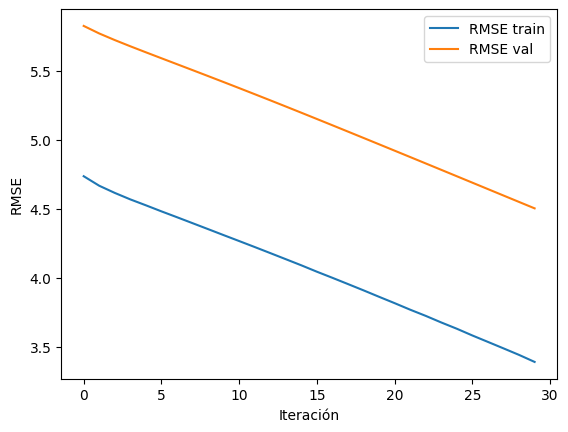

In [ ]:
 # Graficar curvas de entrenamiento y validación
 # para verificar que no existe overfitting
plt.plot(historia.history['loss'],label='RMSE train')
plt.plot(historia.history['val_loss'],label='RMSE val')
plt.xlabel('Iteración')
plt.ylabel('RMSE')
plt.legend();

### **Observaciones y sugerencias:**

- El modelo no tiene *overfitting*
- Se sugiere afinar el modelo modificando varios de sus hiperparámetros y usando técnicas como, por ejemplo, *random grid search*. Los hiperparámetros a afinar pueden ser:
  - *INPUT_LENGTH* (esto implica modificar la fase de pre-procesamiento)
  - Número de unidades de la Red LSTM
  - Pérdida
  - Tasa de aprendizaje
  - Epochs
  - Batch size


## 7. Desempeño del modelo

Suponiendo que el modelo ya ha sido afinado y entrenado, verificaremos su desempeño para el set de prueba y lo compararemos con el desempeño obtenido con los sets de entrenamiento y validación.

Este desempeño es simplemente el RMSE obtenido con cada subset:

In [ ]:
# Cálculo de rmses para train, val y test
rmse_tr = modelo.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl = modelo.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts = modelo.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)

# Imprimir resultados en pantalla
print('Comparativo desempeños:')
print(f'  RMSE train:\t {rmse_tr:.3f}')
print(f'  RMSE val:\t {rmse_vl:.3f}')
print(f'  RMSE test:\t {rmse_ts:.3f}')

Comparativo desempeños:
  RMSE train:	 0.406
  RMSE val:	 0.562
  RMSE test:	 1.074


Desempeño del modelo

In [ ]:
# Cálculo de rmses para train, val y test
rmse_tr = modelo.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl = modelo.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts = modelo.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)

# Imprimir resultados en pantalla
print('Comparativo desempeños:')
print(f'  RMSE train:\t {rmse_tr:.3f}')
print(f'  RMSE val:\t {rmse_vl:.3f}')
print(f'  RMSE test:\t {rmse_ts:.3f}')

Comparativo desempeños:
  RMSE train:	 0.406
  RMSE val:	 0.562
  RMSE test:	 1.074


Los desempeños son comparables lo cual quiere decir que el modelo generaliza bastante bien.

##8. Predicciones con el modelo entrenado

Suponiendo que el modelo ya ha sido afinado, podemos ponerlo a prueba con el set *test*.

Creemos primero una función para generar las predicciones:

In [ ]:
def predecir(x, model, scaler):
    '''Genera la predicción de OUTPUT_LENGTH instantes
    de tiempo a futuro con el modelo entrenado.

    Entrada:
    - x: batch (o batches) de datos para ingresar al modelo
      (tamaño: BATCHES X INPUT_LENGTH X FEATURES)
    - model: Red LSTM entrenada
    - scaler: escalador (requerido para llevar la predicción a la escala original)

    Salida:
    - y_pred: la predicción en la escala original (tamaño: BATCHES X OUTPUT_LENGTH X FEATURES)
    '''

    # Calcular predicción escalada en el rango de -1 a 1
    y_pred_s = model.predict(x,verbose=0)

    # Llevar la predicción a la escala original
    y_pred = scaler.inverse_transform(y_pred_s)

    return y_pred.flatten()

In [ ]:
# Calcular predicciones sobre el set de prueba
y_ts_pred = predecir(x_ts_s, modelo, scaler)

Analicemos este desempeño gráficamente mostrando en la siguiente grafica

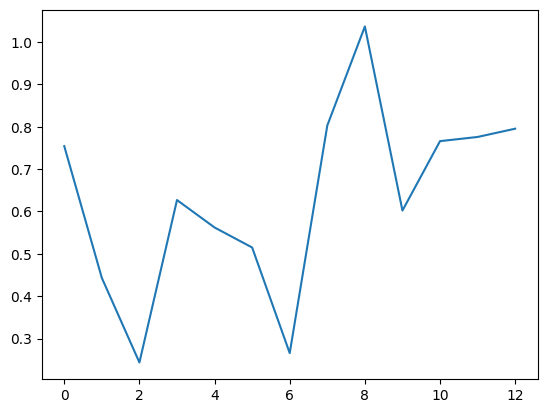

In [ ]:
N = len(y_ts_pred)    # Número de predicciones
ndato = np.linspace(1,N,N)

# Cálculo de errores simples
errores = y_ts.flatten()-y_ts_pred
plt.plot(errores);

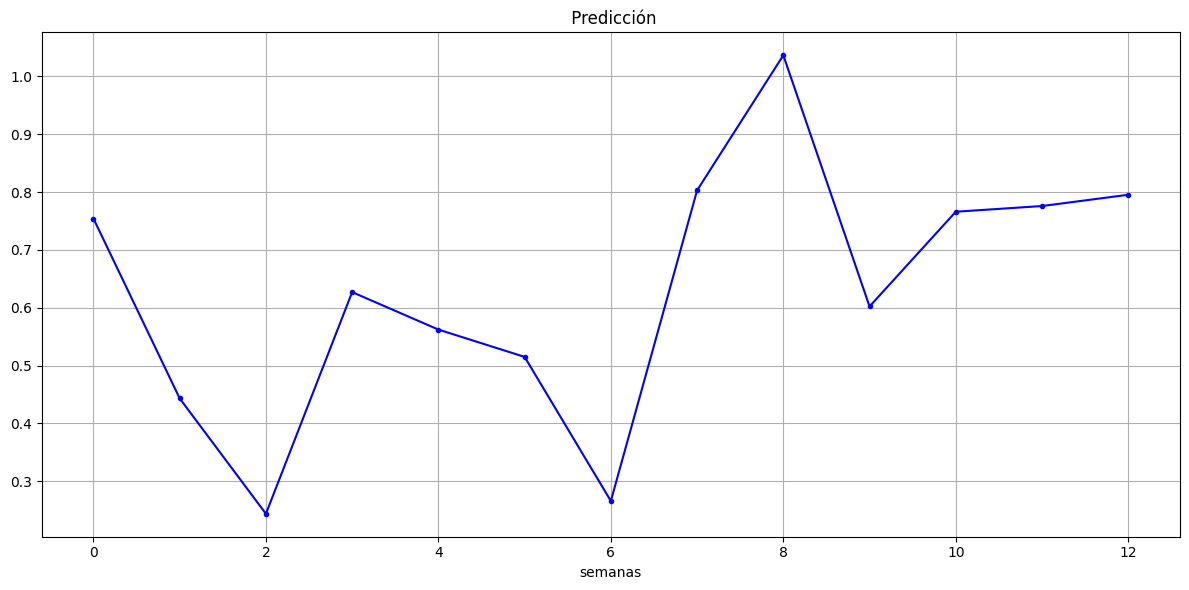

In [ ]:
# Calcular predicciones sobre el set de prueba
y_ts_pred = predecir(x_ts_s, modelo, scaler)

# Calcular errores simples
errores = y_ts.flatten() - y_ts_pred

# Graficar errores
plt.figure(figsize=(12, 6))
plt.plot(errores, marker='.', linestyle='-', color='b')
plt.title(' Predicción')
plt.xlabel('semanas')
plt.grid(True)
plt.tight_layout()
plt.show()
